In [2]:
import pandas as pd
import numpy as np

In [3]:
dat = pd.read_csv('./Output/X_mc_noisy.csv')
real = pd.read_csv('ex.txt',sep=r'\s+')
real

,Synthesis_temperature,Sintering_temperature,Sintering_time,Heating_rate,Particle_size,Standard_deviation,Surface_area,Tab_density
0,800,700,1.0,200,1.7,4.5,1.3,1.026
1,800,900,12.0,200,4.7,1.6,0.5,1.784
2,800,700,12.0,700,1.9,3.9,1.2,0.986
3,800,900,1.0,700,3.4,2.9,0.7,1.393
4,900,700,12.0,200,1.8,4.1,2.8,0.997
5,900,900,1.0,200,3.2,2.2,0.7,1.707
6,900,700,1.0,700,1.5,6.4,4.1,1.133
7,900,900,12.0,700,4.7,1.6,0.5,2.090
8,850,800,6.5,450,2.4,3.6,1.8,1.232
9,850,800,6.5,450,2.4,3.0,1.9,1.245


In [4]:
import matplotlib.pyplot as plt
from data import generate_mc_data
# Check if the required columns are present
features = ['Synthesis_temperature', 'Sintering_temperature', 'Sintering_time', 'Heating_rate']
targets = ['Particle_size', 'Standard_deviation', 'Surface_area', 'Tab_density']

# Extract features
X = real[features]
y = real[targets]


In [ ]:
rng = np.random.default_rng(43)

n_simulations = 100
noise_level_X = noise_level_y = .05
# Tạo dữ liệu mô phỏng cho X
X_mc = []
for _ in range(n_simulations):
	X_noisy = X + rng.normal(0, noise_level_X * X, size=X.shape)
	X_mc.append(X_noisy)

# Tạo dữ liệu mô phỏng cho y
y_mc = []
for _ in range(n_simulations):
	y_noisy = y + rng.normal(0, noise_level_y * y, size=y.shape)
	y_mc.append(y_noisy)

# Gộp dữ liệu mô phỏng X và thêm cột 'Simulation'
X_mc_df = pd.concat([pd.DataFrame(data, columns=X.columns).assign(Simulation=i) 
							for i, data in enumerate(X_mc)])

ValueError: No objects to concatenate

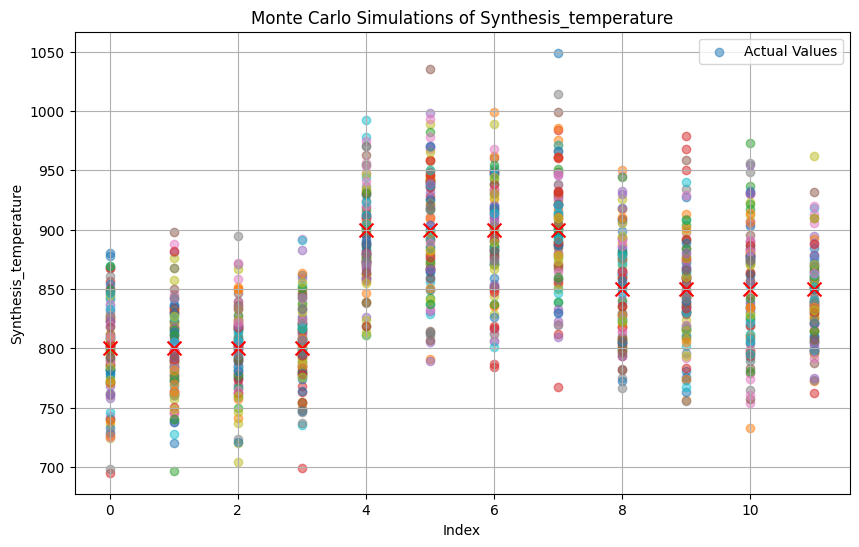

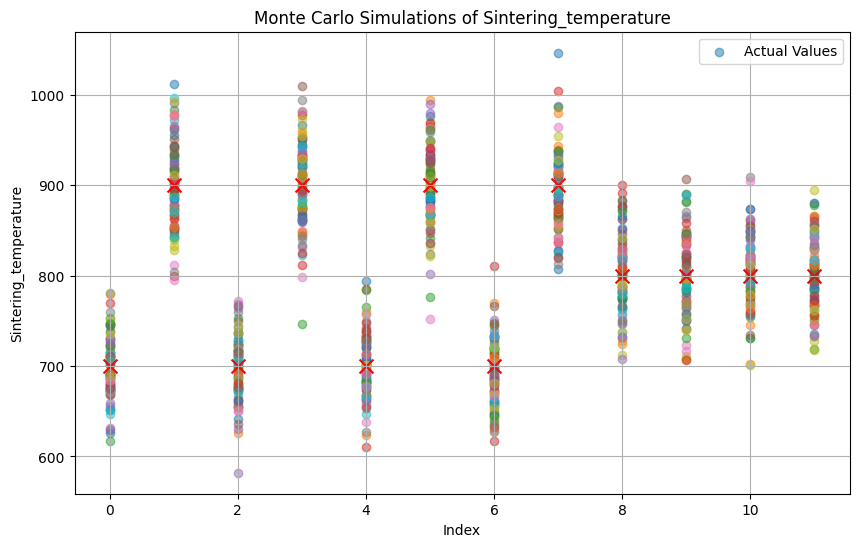

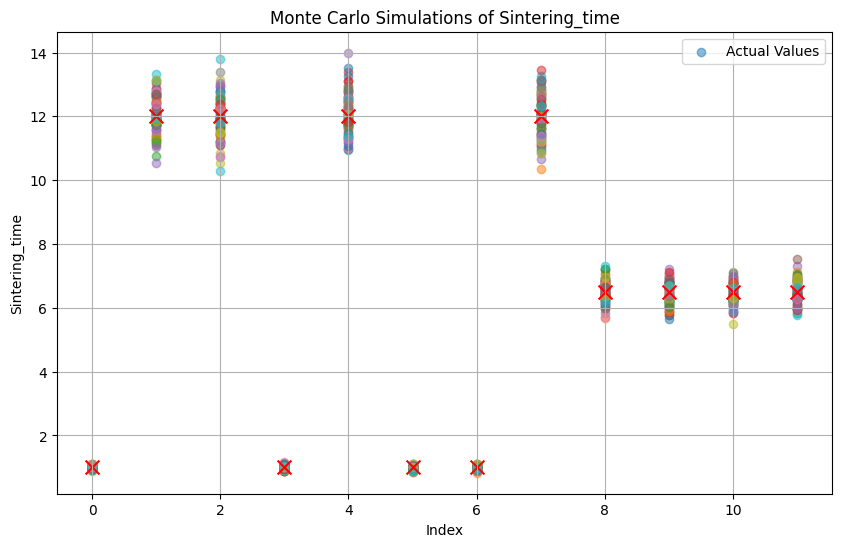

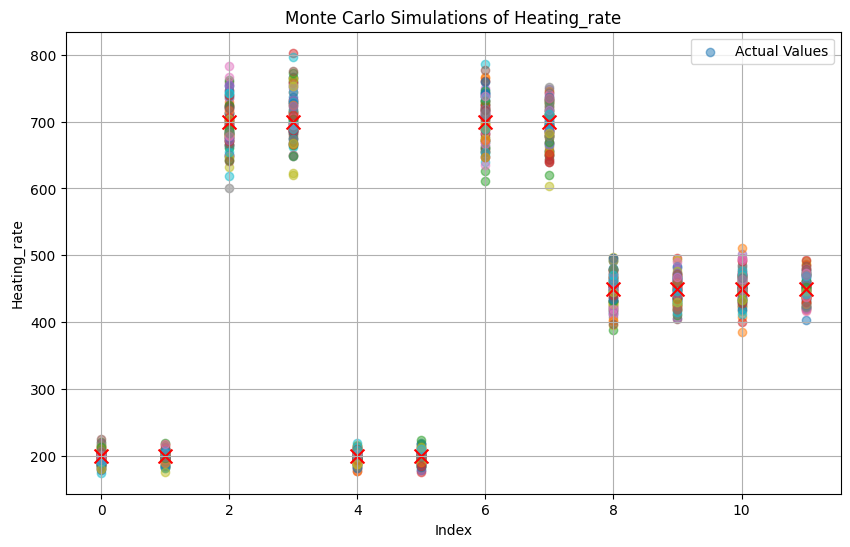

In [26]:
# Vẽ biểu đồ scatter theo Simulation
for col in X.columns:
    plt.figure(figsize=(10, 6))
    
    # Vẽ giá trị từ từng Simulation
    for sim in X_mc_df['Simulation'].unique():
        data_sim = X_mc_df[X_mc_df['Simulation'] == sim]
        plt.scatter(range(len(data_sim[col])), data_sim[col], alpha=0.5, label=f'Simulation {sim}' if sim == 0 else "")
    
    # Vẽ giá trị thực tế
    plt.scatter(range(len(X[col])), X[col], color="red", label="Actual Values", marker="x", s=100)

    # Cấu hình biểu đồ
    plt.title(f"Monte Carlo Simulations of {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend(["Actual Values"])
    plt.grid(True)
    plt.show()
